In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans



In [22]:
image_path="../output_videos/player_1.png"

image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

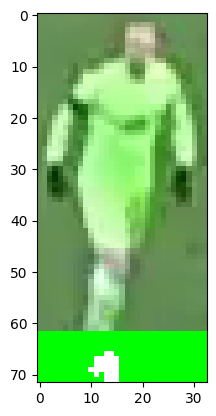

In [23]:
plt.imshow(image)
plt.show()

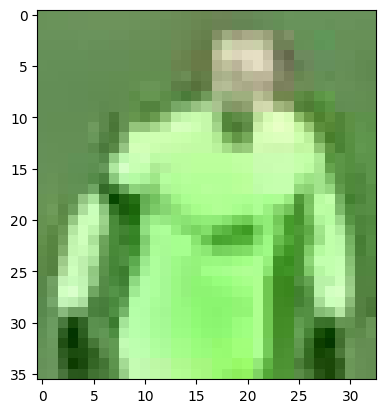

In [24]:
# take the top half of the image
top_half_image=image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

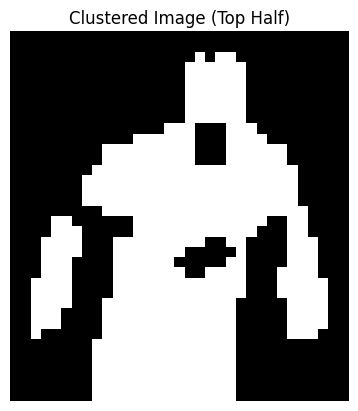

In [33]:
# Reshape the top half image into 2D array of pixels (num_pixels, 3)
image_2d = top_half_image.reshape(-1, 3)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get cluster labels (1 label per pixel)
labels = kmeans.labels_

# Reshape labels back to 2D image shape (height, width)
clustered_image = labels.reshape(top_half_image.shape[:2])

# Show clustered image
plt.imshow(clustered_image, cmap='gray')  # or cmap='viridis' for color clusters
plt.title("Clustered Image (Top Half)")
plt.axis('off')
plt.show()

In [36]:
## Usually the background is going to be on the corners, so the class of the corner is the class of the background

corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print("Non player cluster: ",non_player_cluster)

player_cluster=1-non_player_cluster
print("Player cluster: ",player_cluster)

kmeans.cluster_centers_[player_cluster]


Non player cluster:  0
Player cluster:  1


array([173.1402439 , 238.60772358, 147.7398374 ])